# import 모음

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import konlpy
import re

# 웹크롤링

In [ ]:
html = requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%B0%98%EB%A0%A4%EA%B2%AC%EB%86%80%EC%9D%B4%ED%84%B0&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=43&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=101').text

soup = BeautifulSoup(html, 'html.parser')
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0'}
news_tit = soup.find_all(class_ = "news_tit")
news_date = soup.find_all('span', attrs={'class':'info'})

In [ ]:
titles = []
links = []
dates = []
for i in range(1000):
    url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%B0%98%EB%A0%A4%EA%B2%AC%EB%86%80%EC%9D%B4%ED%84%B0&start=11'
    url2 = str(i) + '1'
    url = url1 + url2
    
    html = requests.get(url, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    news_tit = soup.find_all(class_ = "news_tit")
    news_date = soup.find_all('span', attrs={'class':'info'})
    for j in range(10):
        titles.append(news_tit[j].text)
        links.append(news_tit[j].attrs['href'])
        dates.append(news_date[j].text)

print(titles[0], links[0])

경기 구리시, "불법 개농장에서 구조된 32마리 반려견 새 삶" https://www.ajunews.com/view/20220427150759431


In [ ]:
article = pd.DataFrame(columns = ['title', 'link'])
article['title'] = titles
article['link'] = links
article['date'] = dates
article[:3]

,title,link,date
0,"경기 구리시, ""불법 개농장에서 구조된 32마리 반려견 새 삶""",https://www.ajunews.com/view/20220427150759431,2022.04.27.
1,‘펫팸(Pet+Family)’ 명소로 부상한 구리 장자호수생태공원 ‘반려견 놀이터...,http://news.heraldcorp.com/view.php?ud=2021040...,2021.04.07.
2,구리 장자호수공원 반려견놀이터 인기…하루 130명 방문,http://www.edaily.co.kr/news/newspath.asp?news...,2021.04.02.


In [ ]:
article['word'] = [re.sub('[^a-zA-Z가-힣]', ' ', article['title'][i]).split()\
                   for i in range(article.shape[0])]

In [ ]:
for i in range(article.shape[0]):
    if '.' not in article['date'][i]:
        article['date'][i] = None    

In [ ]:
# csv 파일로 저장
article.to_csv('naver_news_crawling_10000.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 중복 행 제거
article_df = pd.read_csv('naver_news_crawling_10000.csv', encoding='utf-8-sig')
article_df = article_df.drop_duplicates(subset=None, keep='first', \
                                        inplace=False, ignore_index=True)

In [ ]:
# csv 파일로 저장
article_df.to_csv('naver_news_crawling_10000_noduple.csv', index=False, encoding='utf-8-sig')

# 데이터 정제 - 텍스트마이닝

In [ ]:
import konlpy
import pandas as pd
import numpy as np

In [ ]:
# kkma 만들기
kkma = konlpy.tag.Kkma()

In [ ]:
df = pd.read_csv('./data/naver_news_crawling_10000_noduple.csv', encoding='utf-8-sig')
df

,title,link,date,word
0,"전북, 반려동물 놀이터 잇따라 조성",http://www.segye.com/content/html/2022/11/01/2...,NaN,"['전북', '반려동물', '놀이터', '잇따라', '조성']"
1,광산구 수랑공원에 광주 첫 반려견 놀이터…내년 상반기 착공,http://www.newsis.com/view/?id=NISX20221027_00...,NaN,"['광산구', '수랑공원에', '광주', '첫', '반려견', '놀이터', '내년'..."
2,광주에 지역 첫 반려견 놀이터 생긴다,http://www.namdonews.com/news/articleView.html...,NaN,"['광주에', '지역', '첫', '반려견', '놀이터', '생긴다']"
3,광주에 첫 반려견 놀이터 생긴다,https://www.olchiolchi.com/%ea%b4%91%ec%a3%bc%...,NaN,"['광주에', '첫', '반려견', '놀이터', '생긴다']"
4,혼자 버스타고 놀이터 가던 美 시애틀 명견 하늘나라로,https://www.yna.co.kr/view/AKR2022102002560000...,NaN,"['혼자', '버스타고', '놀이터', '가던', '시애틀', '명견', '하늘나라로']"
...,...,...,...,...
2737,"조명자 수원시장 예비후보, 반려동물 테마파크 조성 등 동물복지 향상 공약",https://www.viva100.com/main/view.php?key=2022...,2022.04.18.,"['조명자', '수원시장', '예비후보', '반려동물', '테마파크', '조성', ..."
2738,민주당 제주도의원 맞대결 '일도2동갑' 국민의힘은,https://www.nocutnews.co.kr/news/5741268,2022.04.16.,"['민주당', '제주도의원', '맞대결', '일도', '동갑', '국민의힘은']"
2739,"삼도1·2동 윤용팔 ""구도심 되살릴 뉴딜 사업 도입""",http://www.jejusori.net/news/articleView.html?...,2022.04.01.,"['삼도', '동', '윤용팔', '구도심', '되살릴', '뉴딜', '사업', '..."
2740,'어린이날 인천에서 놀자' - 아이와 즐길 수 있는 공연과 나들이 장소,http://www.incheonin.com/news/articleView.html...,2022.04.29.,"['어린이날', '인천에서', '놀자', '아이와', '즐길', '수', '있는',..."


In [ ]:
df['title'] = df['title'].str.replace('[^가-힣]', ' ', regex = True)

In [ ]:
# 명사 추출 - apply() 활용
nouns = df['title'].apply(kkma.nouns)
nouns

0                       [전, 전북, 북, 반려, 반려동물, 동물, 놀이터, 조성]
1       [광산, 광산구, 구, 수랑, 수랑공원, 공원, 광주, 반려, 반려견, 견, 놀이터...
2                               [광주, 지역, 반려, 반려견, 견, 놀이터]
3                                   [광주, 반려, 반려견, 견, 놀이터]
4                  [혼자, 버스, 버스타고, 타고, 놀이터, 시애틀, 명견, 하늘나라]
                              ...                        
2737    [조명, 조명자, 자, 수원, 수원시장, 시장, 예비, 예비후보, 후보, 반려, 반...
2738     [민주당, 제주, 제주도, 제주도의원, 도, 의원, 맞대결, 일도, 동갑, 국민, 힘]
2739                          [삼도, 동, 윤, 구도심, 뉴딜, 사업, 도입]
2740                       [어린이날, 인천, 아이, 수, 공연, 나들이, 장소]
2741               [문, 문경운, 경운, 반려, 반려동물, 동물, 문화, 육성, 공약]
Name: title, Length: 2742, dtype: object

In [ ]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0          전
0         전북
0          북
0         반려
0       반려동물
        ... 
2741    반려동물
2741      동물
2741      문화
2741      육성
2741      공약
Name: title, Length: 29562, dtype: object

In [ ]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word':nouns})

# 글자 수 추가
df_word['count'] = df_word['word'].str.len()

# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,전북,2.0
0,반려,2.0
0,반려동물,4.0
0,동물,2.0
0,놀이터,3.0
...,...,...
2741,반려동물,4.0
2741,동물,2.0
2741,문화,2.0
2741,육성,2.0


In [ ]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False)\
        .agg(count = ('word', 'count'))\
        .sort_values('count', ascending=False)
df_word

,word,count
1280,반려,2226
1285,반려견,1635
675,놀이터,1286
889,동물,535
1305,반려동물,366
...,...,...
1756,세계수영대회,1
1758,세균,1
1760,세나,1
1761,세나개,1


In [ ]:
df_word.to_csv('naver_news_textmining.csv', encoding='cp949')

# 시각화

## 빈도수 막대그래프

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# '반려견', '놀이터', '반려견놀이터', '반려동물', '개장' 제외한 단어 빈도 상위 30개 추출
top = df_word[6:25]
top

,word,count
327,공원,305
2946,조성,222
2395,운영,144
1675,서울,125
1154,목줄,100
1291,반려견놀이터,98
208,경기,92
1685,서울시,89
959,등록,81
2110,애견,80


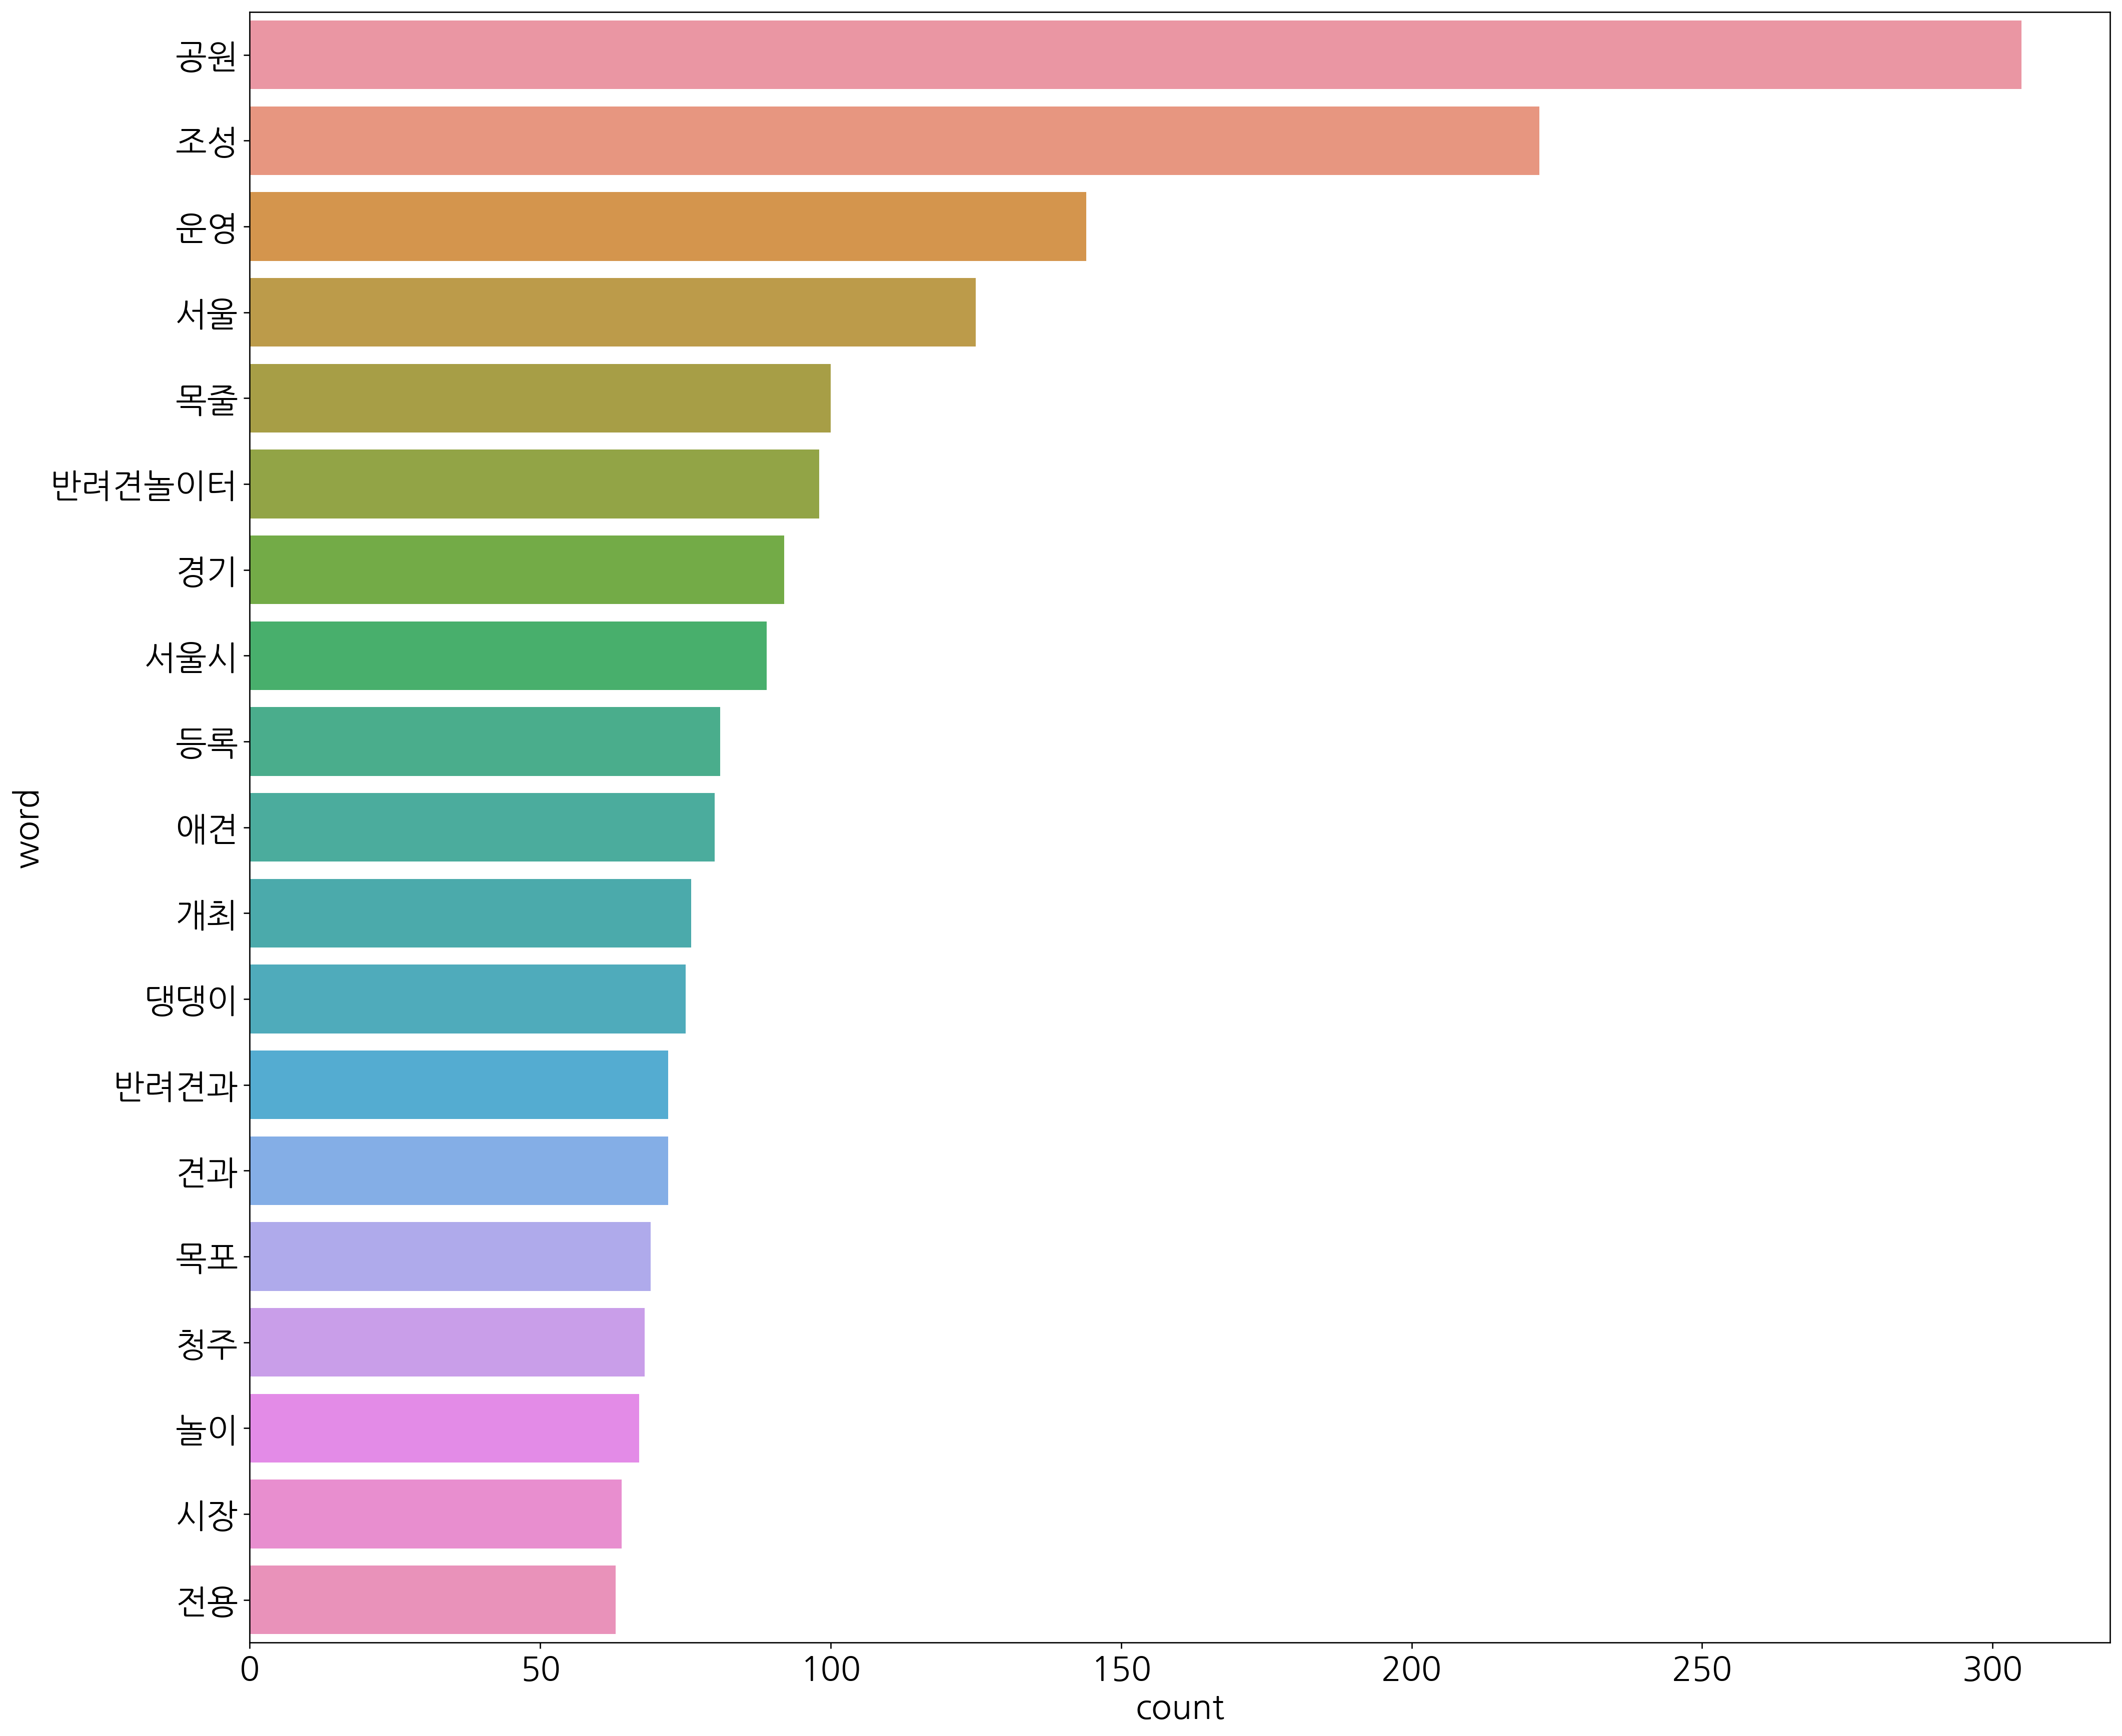

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 가로 세로 크기 설정
plt.rcParams.update({'font.family':'NanumGothic',
                     'font.size':'20',
                     'figure.dpi':'240',
                     'figure.figsize' : [20, 18]})

# 막대 그래프 만들기
sns.barplot(data = top, y='word', x = 'count')
plt.savefig('./data/naver_article_barplot.png',
            facecolor='#eeeeee',
            edgecolor='black',
            format='png', dpi=200)

## 워드클라우드

In [ ]:
from wordcloud import WordCloud
import PIL
import numpy as np

In [ ]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word[6:].set_index('word').to_dict()['count']

# 폰트 설정
font = 'NanumBarunGothicBold.ttf'

# mask 만들기
icon = PIL.Image.open('cloud.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state=1234,
         font_path=font,
         width=800,
         height=800,
         background_color='white',
        mask = img,
              # colormap='inferno'
              )

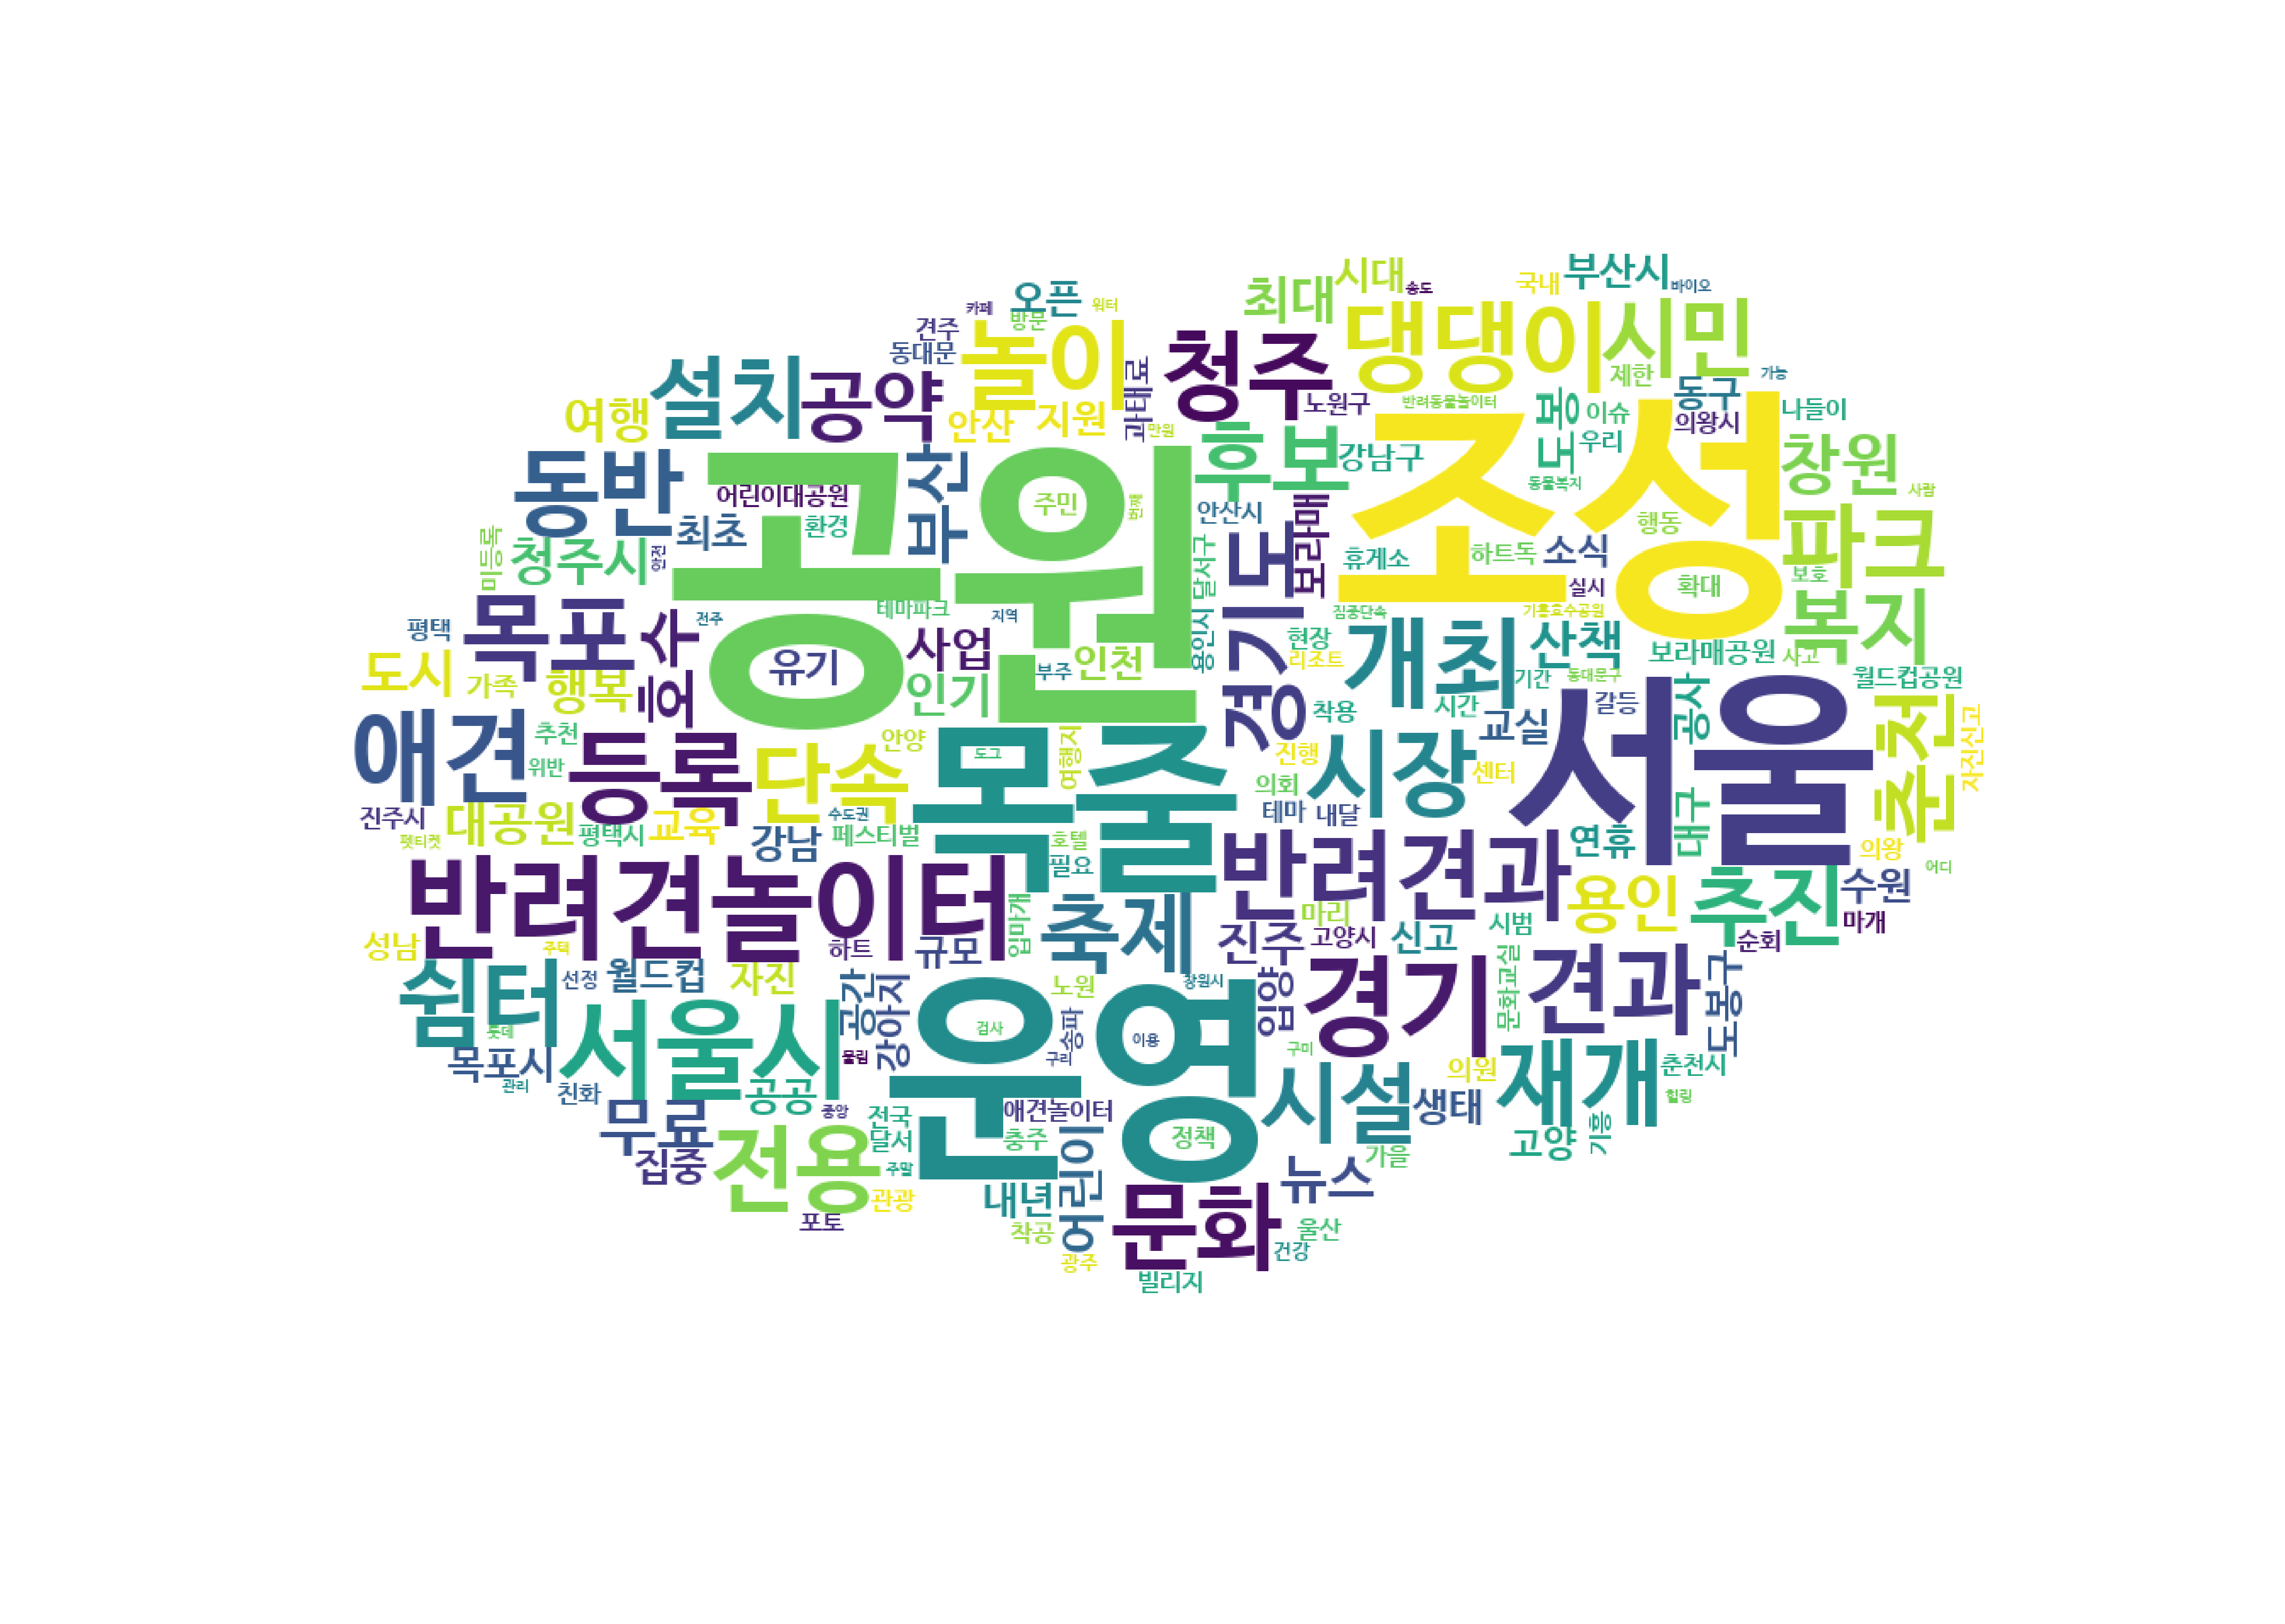

In [ ]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (30, 30))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('./data/naver_article_wc.png')
